# Project Image Ehancement


## 1. Noise Reduction

There are many way to reduce the noise of an image:
   1. mean filter
To get a better result using a color image, we should apply the filter on each channel. The result is not terrible, we still have noise and still can't detect the image of the persons clearly

<IPython.core.display.Javascript object>


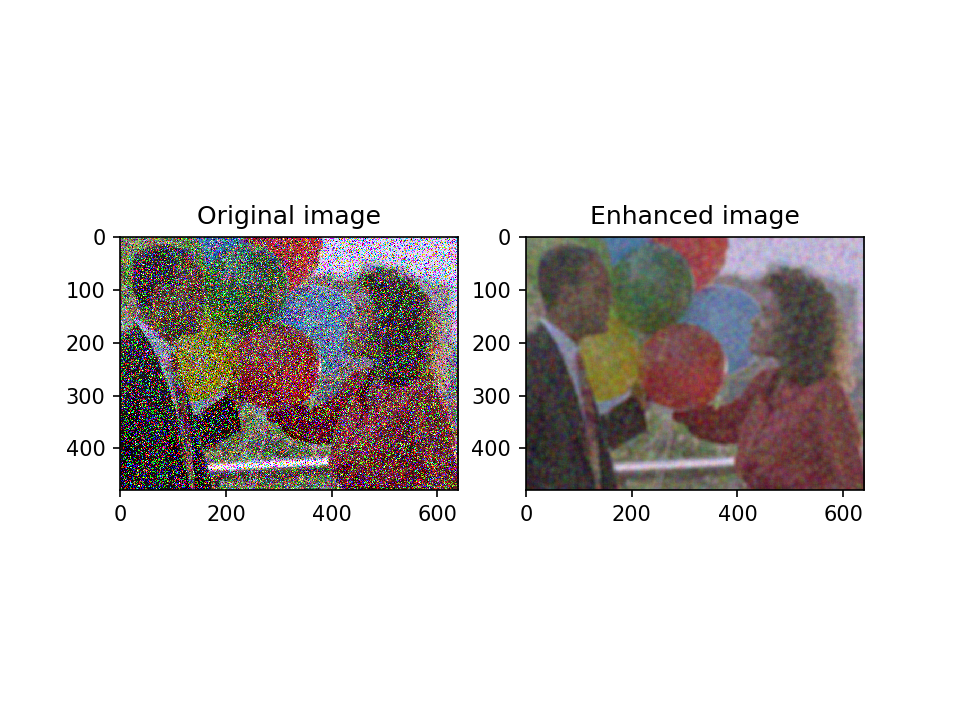

Text(0.5, 1.0, 'Enhanced image')

In [168]:
"1.Noise reduction: mean filter"

from PIL import Image
import numpy as np
from skimage.io import imread,imshow,imsave
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow,imsave
from skimage.filters.rank import mean
from skimage.morphology import disk

image = imread('balloons_noisy.png')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
    
"red"
r = image[:,:,0].astype(np.uint8)
noise_filter_r=mean(r,disk(5))
"green"
g = image[:,:,1].astype(np.uint8)
noise_filter_g=mean(g,disk(5))
"blue"
b = image[:,:,2].astype(np.uint8)
noise_filter_b=mean(b,disk(5))

full_image = np.zeros(image.shape,'uint8')


full_image[..., 0] = noise_filter_r
full_image[..., 1] = noise_filter_g
full_image[..., 2] =noise_filter_b
img = Image.fromarray(full_image)

plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Enhanced image')

 2. median filter
The result is impressive. The noise is completly removed and we see clearly the faces and details that wasn't detectable in the noisy imge.

<IPython.core.display.Javascript object>


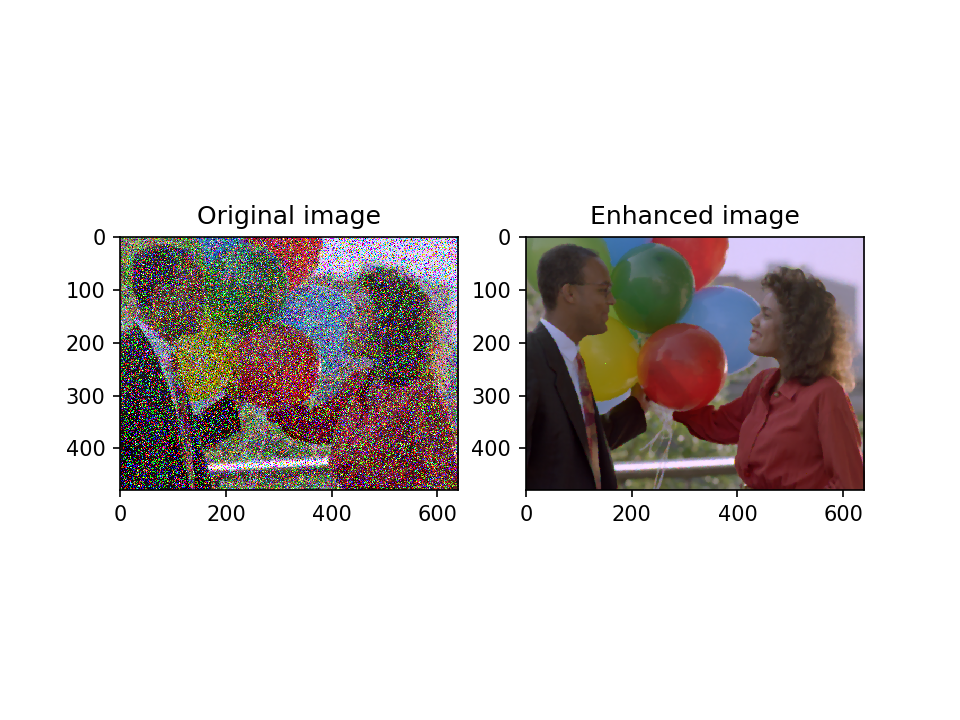

Text(0.5, 1.0, 'Enhanced image')

In [169]:
"1.Noise reduction: median filter"
from skimage.filters.rank import median
image = imread('balloons_noisy.png')
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
"red"
r = image[:,:,0].astype(np.uint8)
noise_filter_r=median(r,disk(3))
"green"
g = image[:,:,1].astype(np.uint8)
noise_filter_g=median(g,disk(3))
"blue"
b = image[:,:,2].astype(np.uint8)
noise_filter_b=median(b,disk(3))

full_image = np.zeros(image.shape,'uint8')


full_image[..., 0] = noise_filter_r
full_image[..., 1] = noise_filter_g
full_image[..., 2] =noise_filter_b
img = Image.fromarray(full_image)

plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Enhanced image')

 3. Otsu filter
the idea is to say that the right threshold value is that try to optimises the separate between the two classes ( background and the foreground)
The intensity value of a given pixel is compared with the average intensity of its immediate neighborhood to improve segmentation results.

<IPython.core.display.Javascript object>


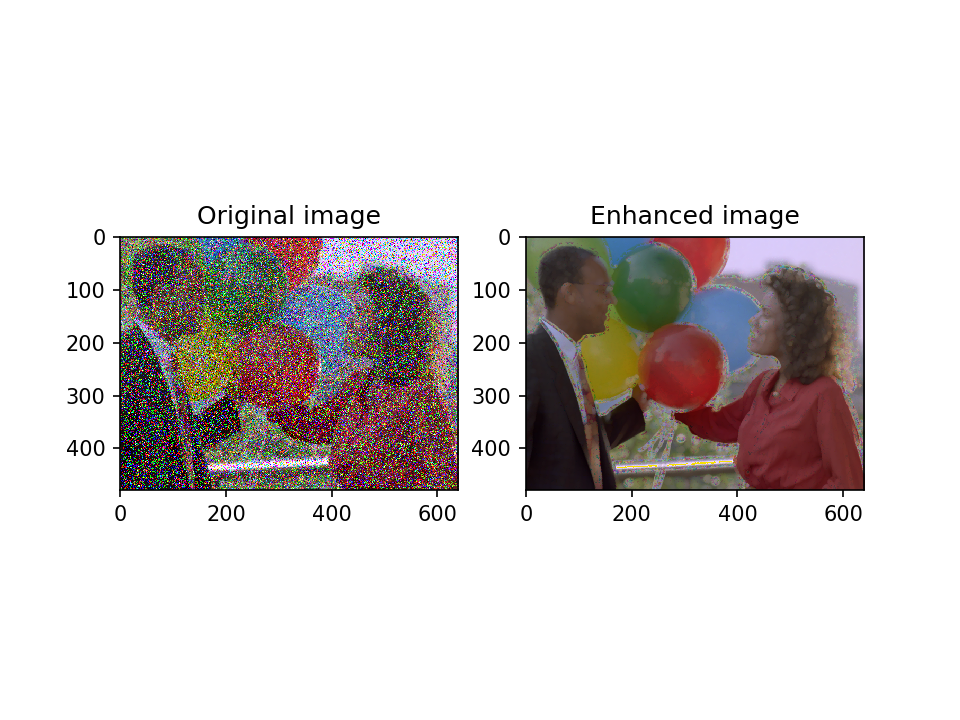

Text(0.5, 1.0, 'Enhanced image')

In [151]:
"1.Noise reduction: otsu filter"

from skimage.filters.rank import otsu
image = imread('balloons_noisy.png')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')

"red"
r = image[:,:,0].astype(np.uint8)
noise_filter_r=otsu(r,disk(3))
"green"
g = image[:,:,1].astype(np.uint8)
noise_filter_g=otsu(g,disk(3))
"blue"
b = image[:,:,2].astype(np.uint8)
noise_filter_b=otsu(b,disk(3))

full_image = np.zeros(image.shape,'uint8')


full_image[..., 0] = noise_filter_r
full_image[..., 1] = noise_filter_g
full_image[..., 2] =noise_filter_b
img = Image.fromarray(full_image)

plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Enhanced image')

## 2. Autolevel
 This filter locally stretches the histogram of greyvalues to cover the entire range of values from "white" to "black". It's used to increase the contrast of an image.


<IPython.core.display.Javascript object>


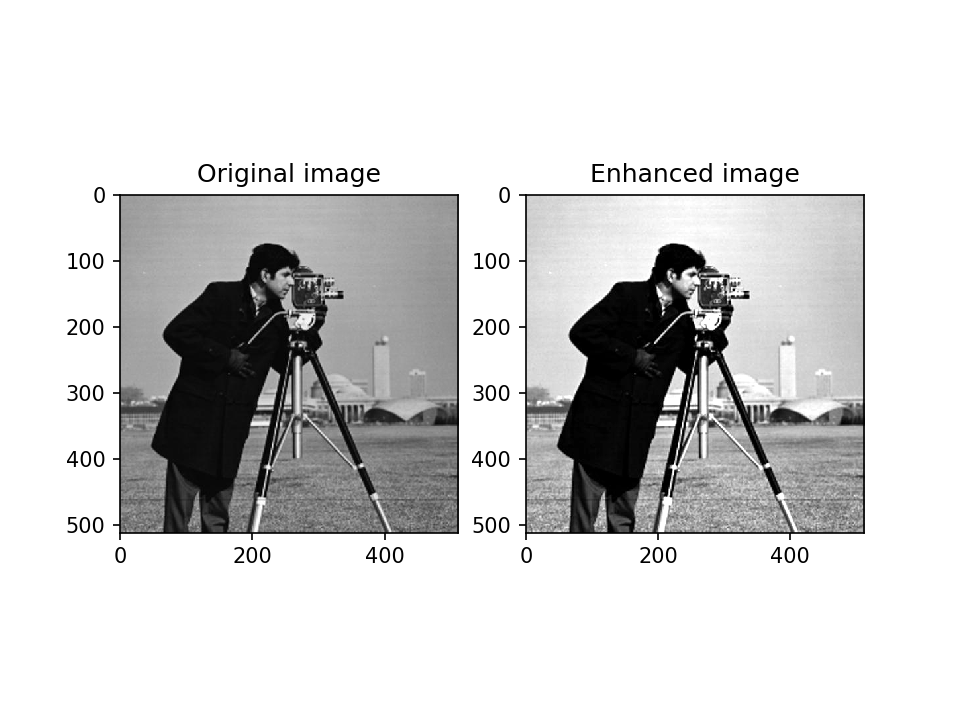

9 189


Text(0.5, 1.0, 'Enhanced image')

In [153]:
"2. Autolevel"
def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

def auto_level(image):
    h = cumul_hist(image)
    for v in range(256):
        if h[v] > 0.05: break
    Tmin = v-1

    for v in range(256):
        if h[255-v] < 0.98: break
    Tmax = (255-v)+1

    print(Tmin,Tmax)

    LUT = np.arange(256)
    LUT[:Tmin] = 0
    LUT[Tmax:] = 255
    LUT[Tmin:Tmax] = (255/(Tmax-Tmin))*(LUT[Tmin:Tmax]-Tmin)
    return LUT[image]
image = imread("camera.jpg")
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(auto_level(image), cmap=plt.cm.gray)
plt.title('Enhanced image')

## 3. gamma correction

<IPython.core.display.Javascript object>


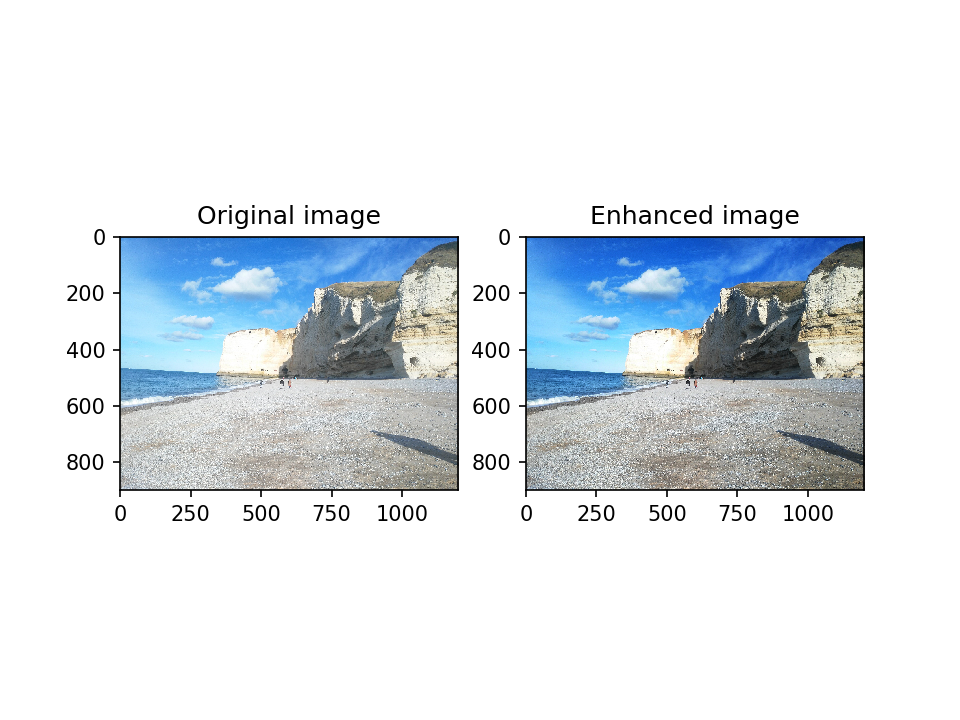

Text(0.5, 1.0, 'Enhanced image')

In [154]:
"3. gamma correction"
#if γ<1 the low-level are contrasted, reversely if γ>1 bright part of the image gains in contrast.
#fonctionne sur les couleurs et grey-levels  
def lut_gamma(gamma):
    lut = np.power(np.arange(0,256),gamma) * np.power(255,1-gamma)
    return lut 
image = imread('etretat.jpg')
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')

"red"
r = image[:,:,0].astype(np.uint8)
im_out_red = lut_gamma(1.5)[r]
"green"
g = image[:,:,1].astype(np.uint8)
im_out_green = lut_gamma(1.5)[g]
"blue"
b = image[:,:,2].astype(np.uint8)
im_out_blue =  lut_gamma(1.5)[b]

full_image = np.zeros(image.shape,'uint8')


full_image[..., 0] = im_out_red
full_image[..., 1] = im_out_green
full_image[..., 2] = im_out_blue
img = Image.fromarray(full_image)

plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Enhanced image')

## 4. Increase color saturation

<IPython.core.display.Javascript object>


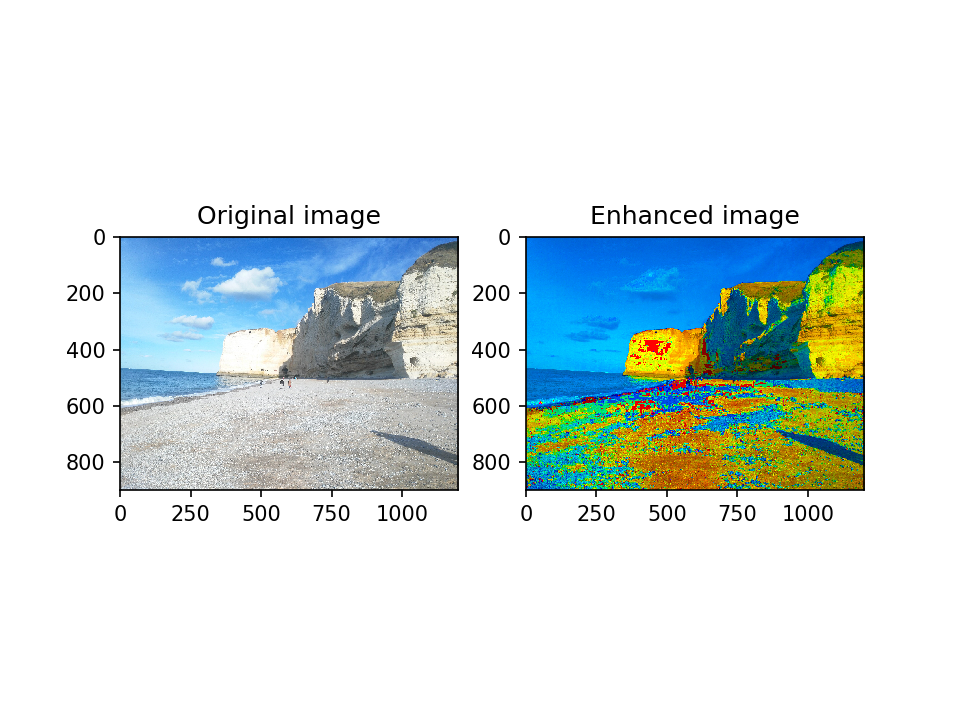

Text(0.5, 1.0, 'Enhanced image')

In [157]:
"4. Increase color saturation"

from skimage.color import rgb2hsv
from skimage.color import hsv2rgb
import colorsys
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

def shift_sat(arr):
    r, g, b,a = np.rollaxis(arr, axis=-1)
    h, s, v = rgb_to_hsv(r, g, b)
    s = 1
    r, g, b = hsv_to_rgb(h, s, v)
    arr = np.dstack((r, g, b,a))
    return arr


    
image = Image.open('etretat.jpg')
img = image.convert('RGBA')
arr = np.array(np.asarray(img).astype('float'))
new_img = Image.fromarray(shift_sat(arr).astype('uint8'), 'RGBA')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
    
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.title('Enhanced image')


<IPython.core.display.Javascript object>


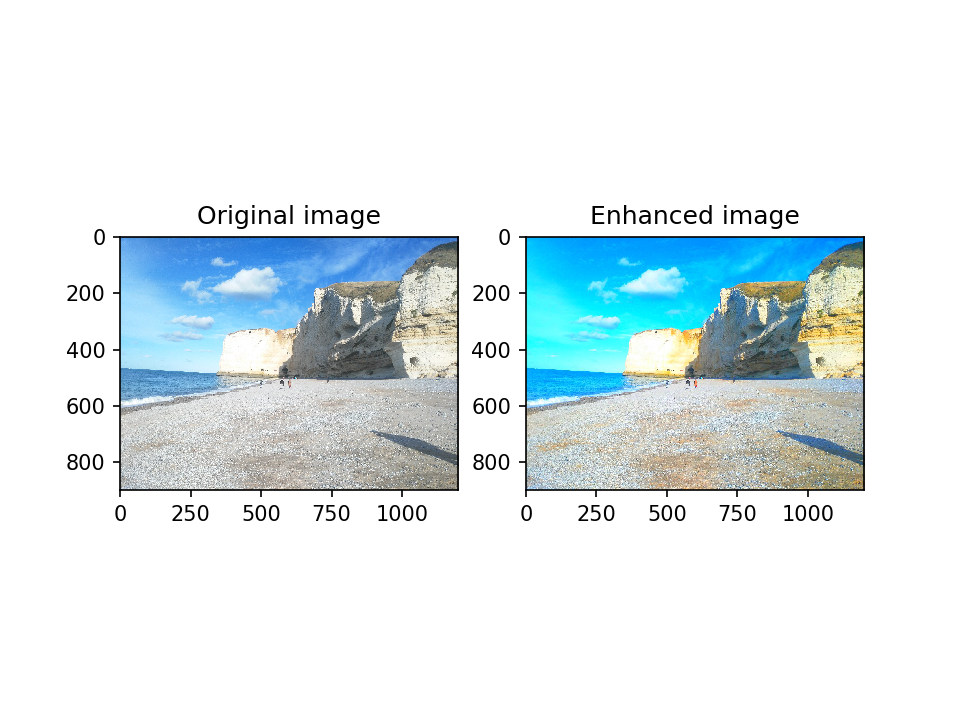

Text(0.5, 1.0, 'Enhanced image')

In [161]:
"Adjust image color balance"
from PIL import ImageEnhance

image = Image.open('etretat.jpg')
color_image = ImageEnhance.Color(image)
color_image.enhance(3).save("color_image.jpg")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
    

im= imread("color_image.jpg")
plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Enhanced image')

## 5. Colorize an image

<IPython.core.display.Javascript object>


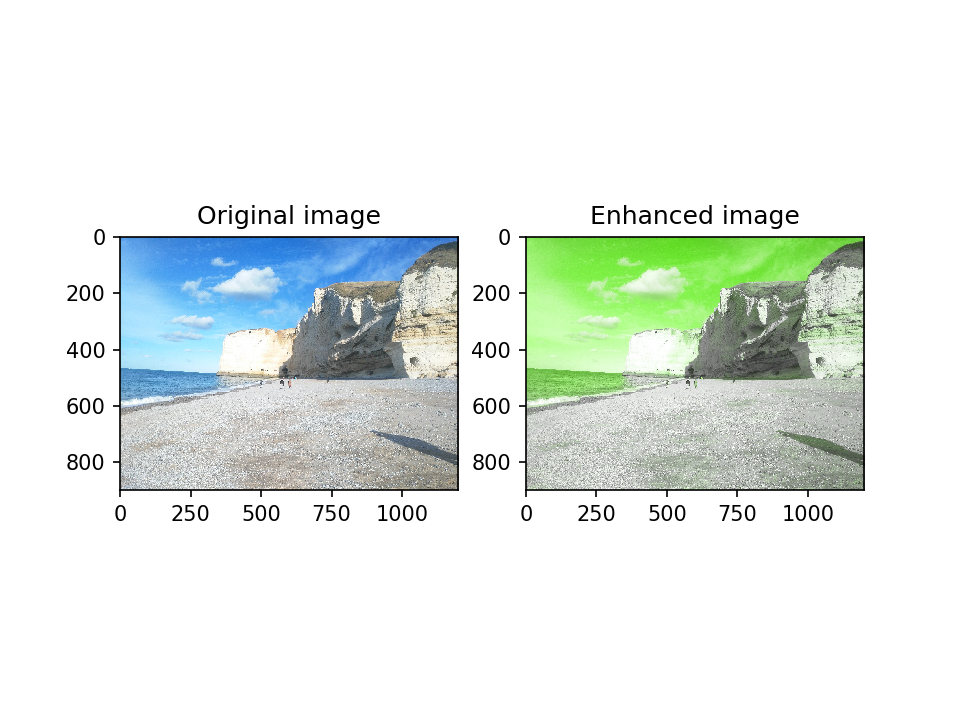

Text(0.5, 1.0, 'Enhanced image')

In [162]:
"5. colorize an image"

from skimage.color import rgb2hsv
from skimage.color import hsv2rgb
import colorsys
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

def shift_hue(arr):
    r, g, b,a = np.rollaxis(arr, axis=-1)
    h, s, v = rgb_to_hsv(r, g, b)
    h=100/360
    r, g, b = hsv_to_rgb(h, s, v)
    arr = np.dstack((r, g, b,a))
    return arr


    
image = Image.open('etretat.jpg')
img = image.convert('RGBA')
arr = np.array(np.asarray(img).astype('float'))
new_img = Image.fromarray(shift_hue(arr).astype('uint8'), 'RGBA')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')
    
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.title('Enhanced image')

## 5.  Sharpness of an image

<IPython.core.display.Javascript object>


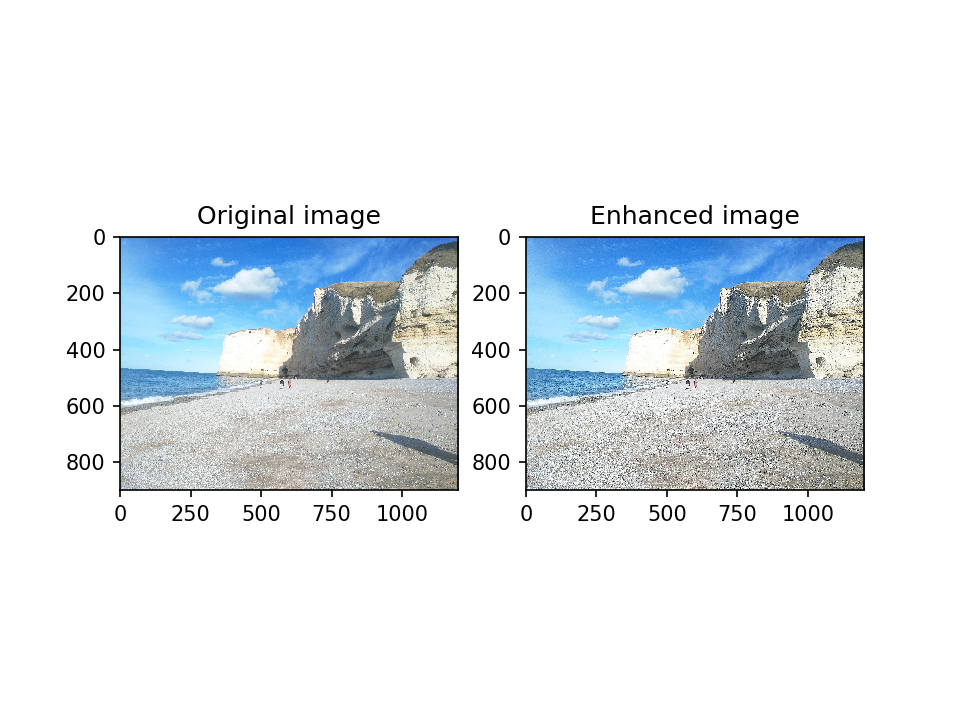

Text(0.5, 1.0, 'Enhanced image')

In [163]:
"Adjust the sharpness of an image"
from PIL import ImageEnhance

    
image = Image.open('etretat.jpg')
sharp_image = ImageEnhance.Sharpness(image)
sharp_image.enhance(3).save("sharp_image.jpg")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')

im= imread("sharp_image.jpg")
plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Enhanced image')

## 5.  Brightness of an image

<IPython.core.display.Javascript object>


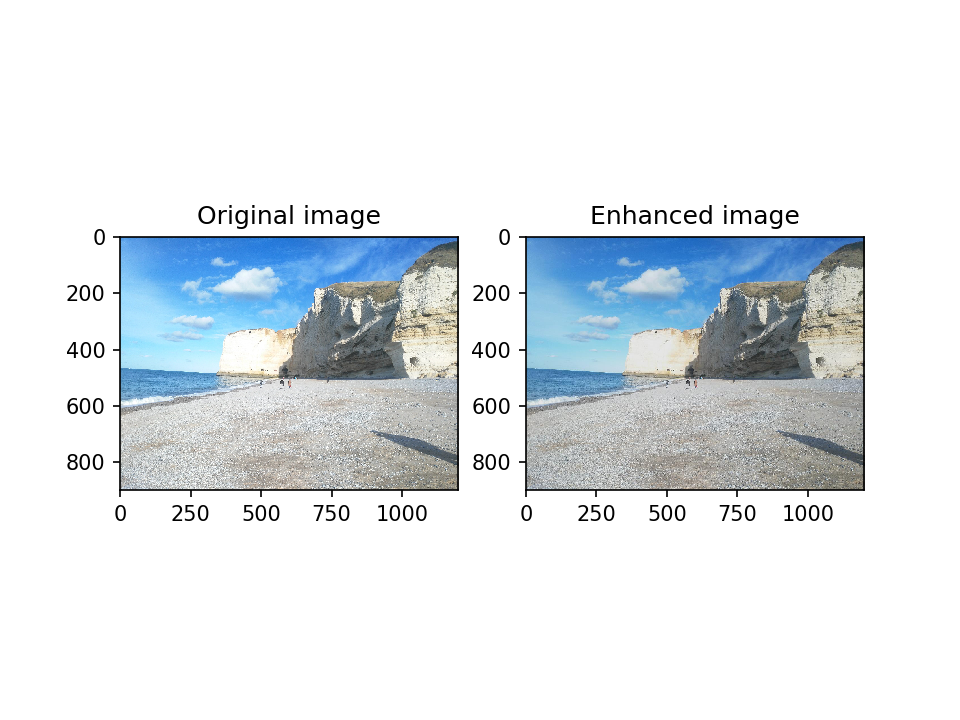

Text(0.5, 1.0, 'Enhanced image')

In [166]:
"adjust the brightness of an image"
from PIL import ImageEnhance

    
image = Image.open('etretat.jpg')
bright_image = ImageEnhance.Brightness(image)
bright_image.enhance(0.9).save("bright_image.jpg")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')

im= imread("bright_image.jpg")
plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Enhanced image')

## 5.  contrast of an image

<IPython.core.display.Javascript object>


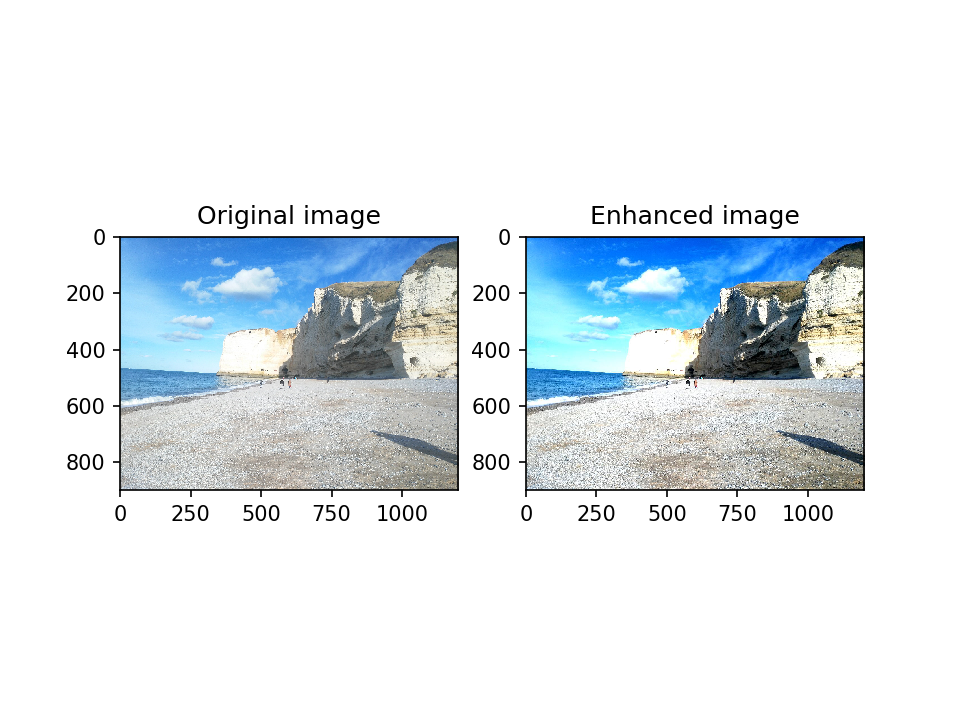

Text(0.5, 1.0, 'Enhanced image')

In [167]:
"Adjust image contrast"
from PIL import ImageEnhance

image = Image.open('etretat.jpg')
contrast_image = ImageEnhance.Contrast(image)
contrast_image.enhance(1.5).save("contrast_image.jpg")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original image')

im= imread("contrast_image.jpg")
plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Enhanced image')